In [1]:
import torchvision.transforms as transforms
from question8 import cnn
from torchvision.transforms import GaussianBlur, ToTensor, Normalize

In [2]:
transform = transforms.Compose([ToTensor()
])

transform2 = transforms.Compose([
 GaussianBlur(kernel_size=3),
 ToTensor()
])
transform3 = transforms.Compose([
    ToTensor(),
    Normalize(0.5, 0.5)
])

all_transforms = [transform, transform2, transform3]

results = []
for transform_ in all_transforms:

    results.append(cnn(transform=transform_))

Using device: cpu
Epoch 1/10, loss: 1.551, accuracy: 0.913, time: 24.946858 seconds
Epoch 1, val accuracy: 0.969
Epoch 2/10, loss: 1.489, accuracy: 0.973, time: 24.877721 seconds
Epoch 2, val accuracy: 0.972
Epoch 3/10, loss: 1.483, accuracy: 0.978, time: 25.143332 seconds
Epoch 3, val accuracy: 0.970
Epoch 4/10, loss: 1.479, accuracy: 0.982, time: 25.728617 seconds
Epoch 4, val accuracy: 0.970
Epoch 5/10, loss: 1.477, accuracy: 0.984, time: 27.332545 seconds
Epoch 5, val accuracy: 0.984
Epoch 6/10, loss: 1.477, accuracy: 0.984, time: 29.622262 seconds
Epoch 6, val accuracy: 0.979
Epoch 7/10, loss: 1.476, accuracy: 0.985, time: 30.121797 seconds
Epoch 7, val accuracy: 0.985
Epoch 8/10, loss: 1.476, accuracy: 0.985, time: 32.224778 seconds
Epoch 8, val accuracy: 0.984
Epoch 9/10, loss: 1.474, accuracy: 0.988, time: 33.471069 seconds
Epoch 9, val accuracy: 0.980
Epoch 10/10, loss: 1.475, accuracy: 0.986, time: 34.882188 seconds
Epoch 10, val accuracy: 0.982
Using device: cpu
Epoch 1/10, 

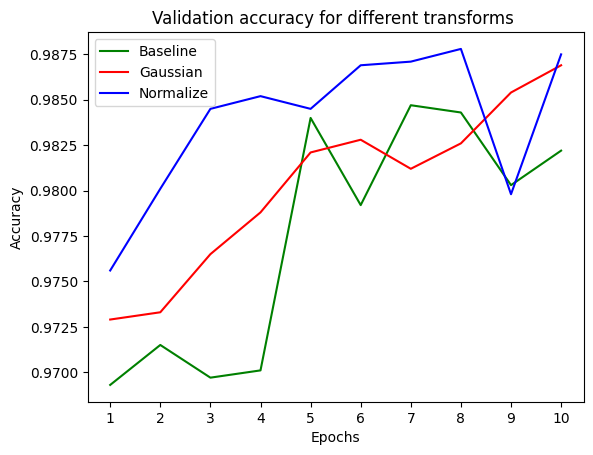

In [7]:
import matplotlib.pyplot as plt
baseline_acc = results[0]['accuracy']
gaussian_acc = results[1]['accuracy']
normalize_acc = results[2]['accuracy']

epochs = results[0]['epoch']
epochs = [str(epoch) for epoch in epochs]

plt.plot(epochs, baseline_acc, 'g', label= 'Baseline')
plt.plot(epochs, gaussian_acc, 'r', label= 'Gaussian')
plt.plot(epochs, normalize_acc, 'b', label= 'Normalize')
plt.title('Validation accuracy for different transforms ')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('Images/acc_transforms.png')
plt.show()